# Data Visualization - Airbnb NYC 2019

Sebelum melakukan ETL, mari kita buat beberapa visualisasi penting untuk memahami data lebih baik.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import uuid
from datetime import datetime

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.drop(columns=['id', 'host_id'], inplace=True)

In [5]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.isna().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.dropna(subset=['name', 'host_name'], inplace=True)

In [8]:
df.isna().sum()

name                                  0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
zero_reviews = df[df['number_of_reviews'] == 0]

print("Data dengan number_of_reviews = 0:")
print(f"Total rows: {len(zero_reviews)}")
print()

last_review_nan = zero_reviews['last_review'].isna().sum()
print(f"NaN values di kolom 'last_review' ketika number_of_reviews = 0: {last_review_nan}")

reviews_per_month_nan = zero_reviews['reviews_per_month'].isna().sum()
print(f"NaN values di kolom 'reviews_per_month' ketika number_of_reviews = 0: {reviews_per_month_nan}")

print()
print("Sample data dengan number_of_reviews = 0:")
print(zero_reviews[['name', 'number_of_reviews', 'last_review', 'reviews_per_month']].head())

Data dengan number_of_reviews = 0:
Total rows: 10037

NaN values di kolom 'last_review' ketika number_of_reviews = 0: 10037
NaN values di kolom 'reviews_per_month' ketika number_of_reviews = 0: 10037

Sample data dengan number_of_reviews = 0:
                                                 name  number_of_reviews  \
2                 THE VILLAGE OF HARLEM....NEW YORK !                  0   
19                  Huge 2 BR Upper East  Cental Park                  0   
26  Magnifique Suite au N de Manhattan - vue Cloitres                  0   
36                        Clean and Quiet in Brooklyn                  0   
38                          Country space in the city                  0   

   last_review  reviews_per_month  
2          NaN                NaN  
19         NaN                NaN  
26         NaN                NaN  
36         NaN                NaN  
38         NaN                NaN  


In [10]:
df['reviews_per_month'].fillna(0, inplace=True)

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df.dtypes

name                                      object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [12]:
df['last_review'].min()

Timestamp('2011-03-28 00:00:00')

In [13]:
df['last_review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

In [14]:
df.isna().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

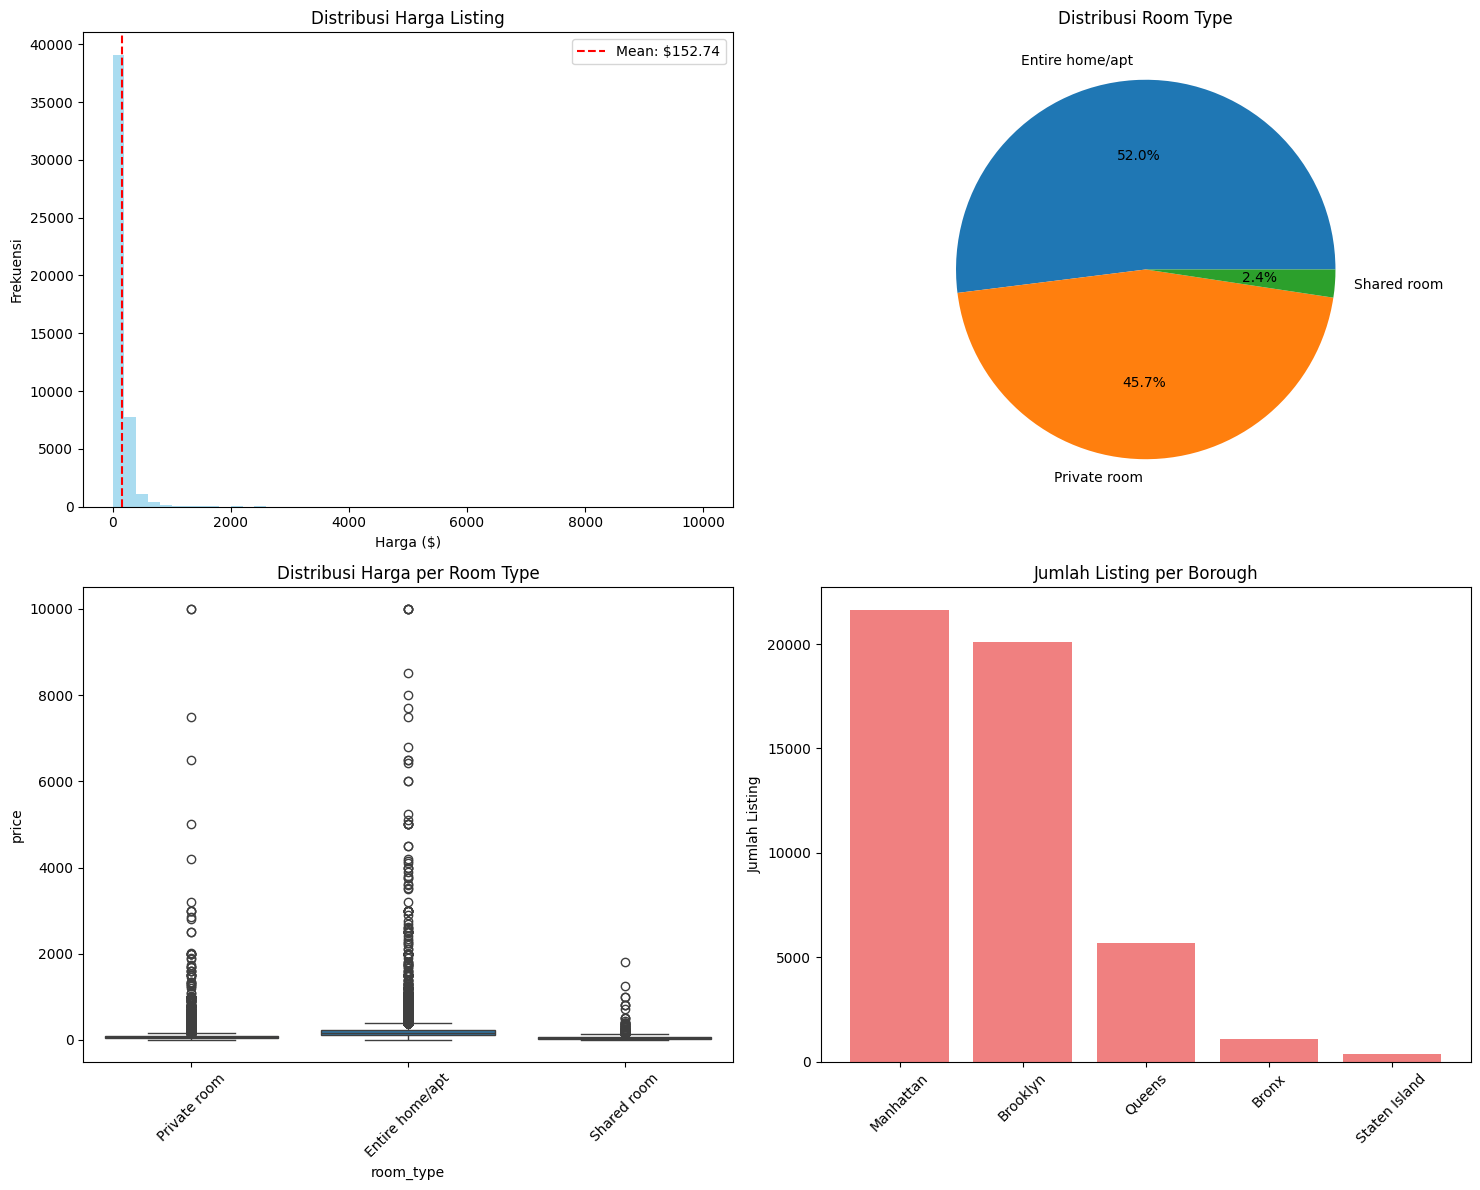

=== STATISTIK DASAR ===
Total listings: 48,858
Rata-rata harga: $152.74
Median harga: $106.00
Range harga: $0.00 - $10000.00


In [15]:
# 1. Distribusi Harga per Room Type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Subplot 1: Distribusi harga
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribusi Harga Listing')
axes[0,0].set_xlabel('Harga ($)')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():.2f}')
axes[0,0].legend()

# Subplot 2: Room type distribution
room_type_counts = df['room_type'].value_counts()
axes[0,1].pie(room_type_counts.values, labels=room_type_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Distribusi Room Type')

# Subplot 3: Harga per room type boxplot
sns.boxplot(data=df, x='room_type', y='price', ax=axes[1,0])
axes[1,0].set_title('Distribusi Harga per Room Type')
axes[1,0].tick_params(axis='x', rotation=45)

# Subplot 4: Neighbourhood group distribution
neighbourhood_counts = df['neighbourhood_group'].value_counts()
axes[1,1].bar(neighbourhood_counts.index, neighbourhood_counts.values, color='lightcoral')
axes[1,1].set_title('Jumlah Listing per Borough')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylabel('Jumlah Listing')

plt.tight_layout()
plt.show()

# Print statistics
print("=== STATISTIK DASAR ===")
print(f"Total listings: {len(df):,}")
print(f"Rata-rata harga: ${df['price'].mean():.2f}")
print(f"Median harga: ${df['price'].median():.2f}")
print(f"Range harga: ${df['price'].min():.2f} - ${df['price'].max():.2f}")

C:\Users\mfari\AppData\Local\Temp\ipykernel_25036\123810694.py:2: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


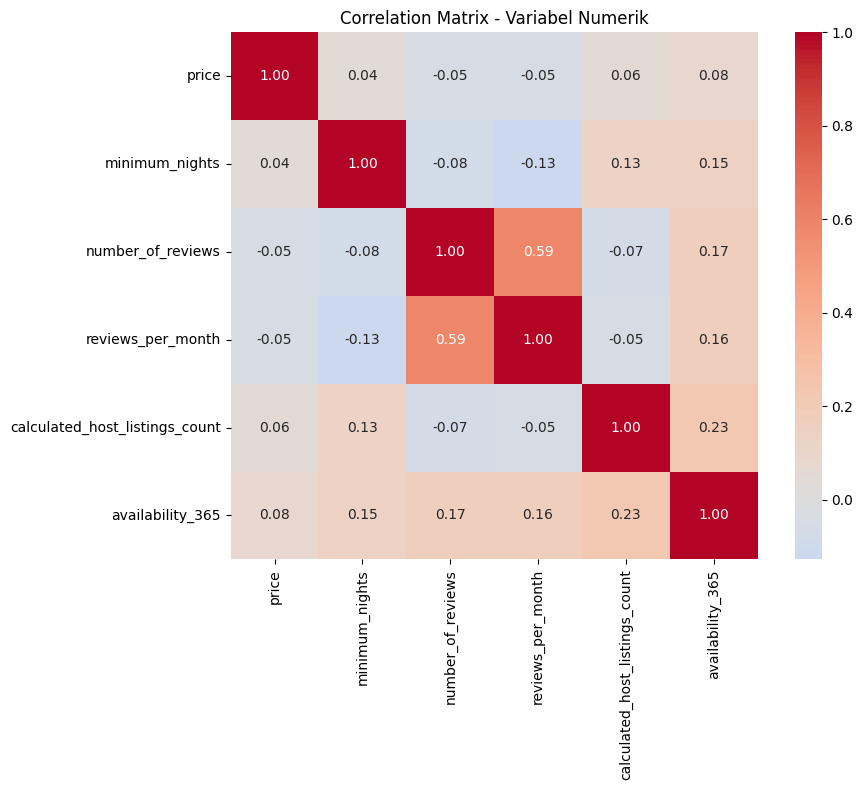

In [16]:
# 2. Visualisasi Geografis - Sebaran Listing di NYC
fig = px.scatter_mapbox(
    df.sample(5000),  # Sample untuk performa
    lat="latitude", 
    lon="longitude",
    color="neighbourhood_group",
    size="price",
    hover_data=["name", "room_type", "price"],
    mapbox_style="open-street-map",
    height=600,
    title="Sebaran Geografis Airbnb Listings di NYC"
)

fig.update_layout(
    mapbox=dict(
        center=dict(lat=40.7128, lon=-74.0060),
        zoom=10
    ),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
               'calculated_host_listings_count', 'availability_365']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix - Variabel Numerik')
plt.tight_layout()
plt.show()

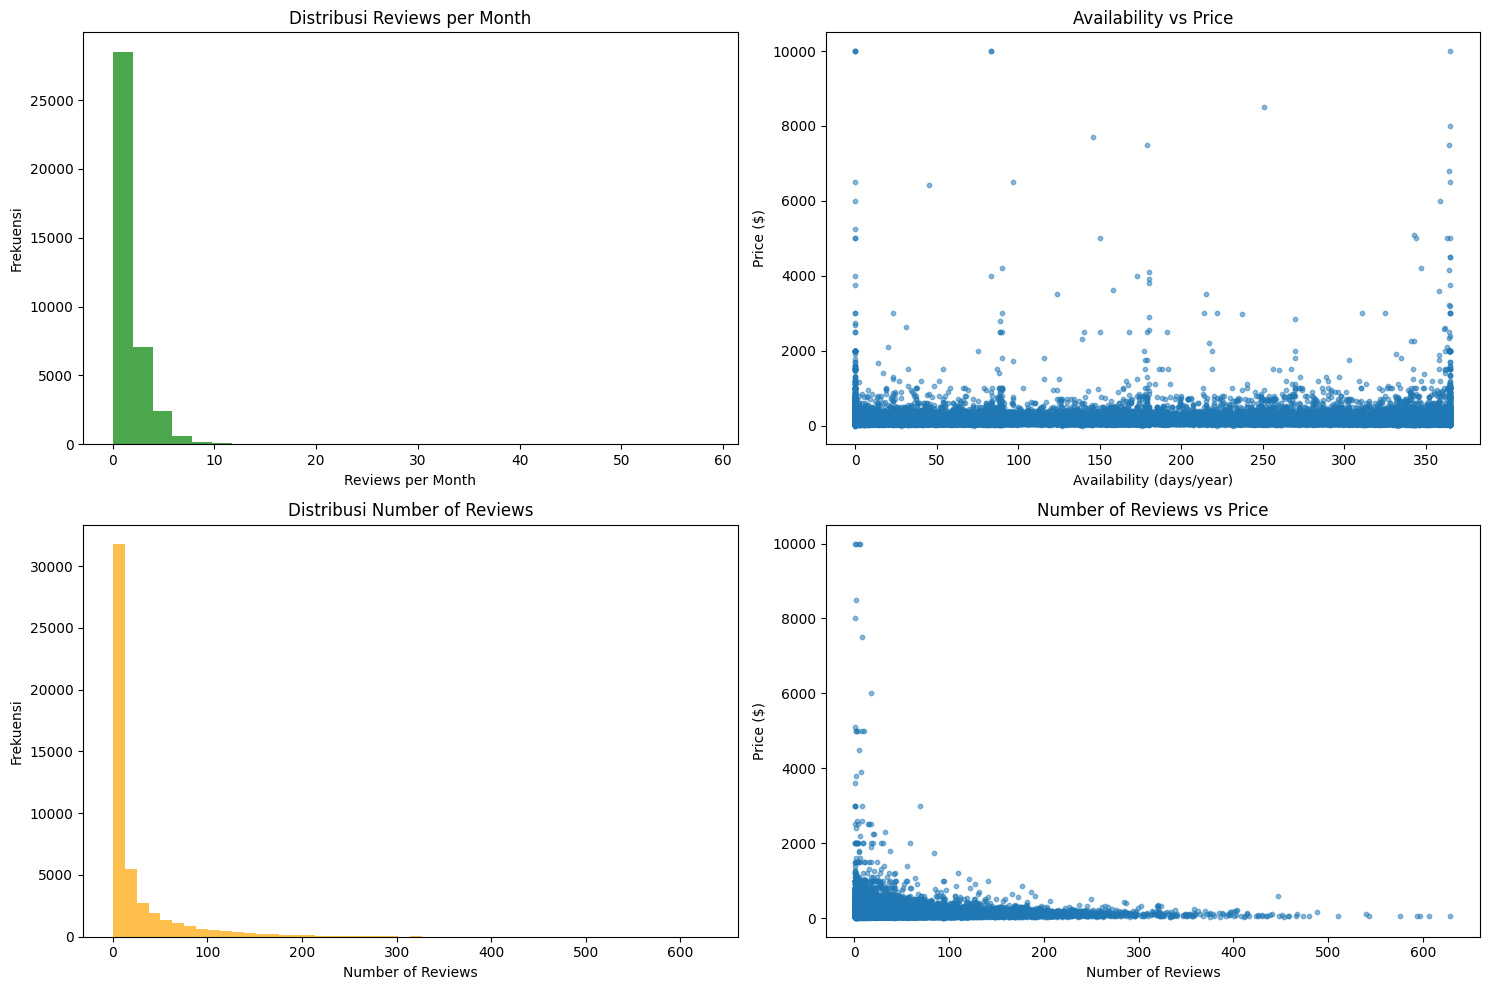


=== TOP 10 NEIGHBOURHOODS BY AVERAGE PRICE ===
                         mean  count
neighbourhood                       
Fort Wadsworth     800.000000      1
Woodrow            700.000000      1
Tribeca            490.638418    177
Sea Gate           487.857143      7
Riverdale          442.090909     11
Prince's Bay       409.500000      4
Battery Park City  367.086957     69
Flatiron District  341.925000     80
Randall Manor      336.000000     19
NoHo               295.717949     78


In [17]:
# 3. Analisis Reviews dan Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Reviews per month distribution
axes[0,0].hist(df[df['reviews_per_month'] > 0]['reviews_per_month'], bins=30, alpha=0.7, color='green')
axes[0,0].set_title('Distribusi Reviews per Month')
axes[0,0].set_xlabel('Reviews per Month')
axes[0,0].set_ylabel('Frekuensi')

# Availability vs Price scatter
axes[0,1].scatter(df['availability_365'], df['price'], alpha=0.5, s=10)
axes[0,1].set_title('Availability vs Price')
axes[0,1].set_xlabel('Availability (days/year)')
axes[0,1].set_ylabel('Price ($)')

# Number of reviews distribution
axes[1,0].hist(df['number_of_reviews'], bins=50, alpha=0.7, color='orange')
axes[1,0].set_title('Distribusi Number of Reviews')
axes[1,0].set_xlabel('Number of Reviews')
axes[1,0].set_ylabel('Frekuensi')

# Price vs Reviews scatter
df_with_reviews = df[df['number_of_reviews'] > 0]
axes[1,1].scatter(df_with_reviews['number_of_reviews'], df_with_reviews['price'], alpha=0.5, s=10)
axes[1,1].set_title('Number of Reviews vs Price')
axes[1,1].set_xlabel('Number of Reviews')
axes[1,1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Top neighbourhoods by average price
top_neighborhoods = df.groupby('neighbourhood')['price'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
print("\n=== TOP 10 NEIGHBOURHOODS BY AVERAGE PRICE ===")
print(top_neighborhoods)

In [18]:
# 4. Dashboard Interaktif - Key Metrics
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Average Price by Borough', 'Room Type Distribution', 
                   'Availability vs Borough', 'Top 10 Hosts by Listings Count'),
    specs=[[{"secondary_y": False}, {"type": "pie"}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Average price by borough
avg_price_borough = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(x=avg_price_borough.values, y=avg_price_borough.index, 
           orientation='h', name='Avg Price', marker_color='lightblue'),
    row=1, col=1
)

# 2. Room type pie chart
room_type_counts = df['room_type'].value_counts()
fig.add_trace(
    go.Pie(labels=room_type_counts.index, values=room_type_counts.values, name="Room Type"),
    row=1, col=2
)

# 3. Availability by borough
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(x=avg_availability.values, y=avg_availability.index, 
           orientation='h', name='Avg Availability', marker_color='lightgreen'),
    row=2, col=1
)

# 4. Top hosts
top_hosts = df.groupby('host_name')['calculated_host_listings_count'].first().sort_values(ascending=False).head(10)
fig.add_trace(
    go.Bar(x=top_hosts.index, y=top_hosts.values, name='Listings Count', marker_color='salmon'),
    row=2, col=2
)

fig.update_layout(height=800, title_text="Airbnb NYC 2019 - Key Metrics Dashboard")
fig.update_xaxes(title_text="Average Price ($)", row=1, col=1)
fig.update_xaxes(title_text="Average Availability (days)", row=2, col=1)
fig.update_xaxes(title_text="Host Name", row=2, col=2)
fig.update_yaxes(title_text="Listings Count", row=2, col=2)

fig.show()

print("\n=== SUMMARY INSIGHTS ===")
print(f"• Total unique hosts: {df['host_name'].nunique():,}")
print(f"• Most expensive borough: {avg_price_borough.index[-1]} (${avg_price_borough.iloc[-1]:.2f})")
print(f"• Most popular room type: {room_type_counts.index[0]} ({room_type_counts.iloc[0]:,} listings)")
print(f"• Average availability: {df['availability_365'].mean():.1f} days per year")


=== SUMMARY INSIGHTS ===
• Total unique hosts: 11,450
• Most expensive borough: Manhattan ($196.90)
• Most popular room type: Entire home/apt (25,393 listings)
• Average availability: 112.8 days per year


# ETL Process - Extract, Transform, Load

Berdasarkan desain skema datawarehouse, kita akan membuat dimensi tables dan fact table menggunakan star schema design.

#### ETL Process - Create Dimension Tables


In [19]:
print("=== STARTING ETL PROCESS ===")
print(f"Original data shape: {df.shape}")
print(f"Data period: {df['last_review'].min()} to {df['last_review'].max()}")
print()

=== STARTING ETL PROCESS ===
Original data shape: (48858, 14)
Data period: 1900-01-01 00:00:00 to 2019-07-08 00:00:00



In [20]:
# 1. Create dim_location table
print("Creating dim_location...")
dim_location = df[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude']].copy()
dim_location = dim_location.drop_duplicates().reset_index(drop=True)
dim_location['id'] = [str(uuid.uuid4()) for _ in range(len(dim_location))]
dim_location = dim_location[['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude']]
print(f"dim_location created with {len(dim_location)} records")

Creating dim_location...
dim_location created with 48834 records
dim_location created with 48834 records


In [21]:
# 2. Create dim_host table
print("Creating dim_host...")
dim_host = df[['host_name']].copy()
dim_host = dim_host.drop_duplicates().reset_index(drop=True)
dim_host['id'] = [str(uuid.uuid4()) for _ in range(len(dim_host))]
dim_host = dim_host[['id', 'host_name']]
print(f"dim_host created with {len(dim_host)} records")

Creating dim_host...
dim_host created with 11450 records


In [22]:
# 3. Create dim_room_type table
print("Creating dim_room_type...")
dim_room_type = df[['room_type']].copy()
dim_room_type = dim_room_type.drop_duplicates().reset_index(drop=True)
dim_room_type['id'] = [str(uuid.uuid4()) for _ in range(len(dim_room_type))]
dim_room_type = dim_room_type[['id', 'room_type']]
print(f"dim_room_type created with {len(dim_room_type)} records")



Creating dim_room_type...
dim_room_type created with 3 records


In [23]:
# 4. Create dim_listing table
print("Creating dim_listing...")
dim_listing = df[['name', 'minimum_nights']].copy()
dim_listing = dim_listing.drop_duplicates().reset_index(drop=True)
dim_listing['id'] = [str(uuid.uuid4()) for _ in range(len(dim_listing))]
dim_listing = dim_listing[['id', 'name', 'minimum_nights']]
print(f"dim_listing created with {len(dim_listing)} records")

Creating dim_listing...
dim_listing created with 48409 records
dim_listing created with 48409 records


In [24]:
# 5. Create dim_date table
print("Creating dim_date...")

# Get unique dates from last_review column (INCLUDING default 1900-01-01)
valid_dates = df[df['last_review'] != pd.to_datetime('1900-01-01')]['last_review'].copy()
date_range = pd.date_range(start=valid_dates.min(), end=valid_dates.max(), freq='D')

# Create base date dimension
dim_date = pd.DataFrame({
    'date': date_range
})

# Add the default date 1900-01-01 for records with no reviews
default_date = pd.DataFrame({
    'date': [pd.to_datetime('1900-01-01')]
})

# Combine the date ranges
dim_date = pd.concat([default_date, dim_date], ignore_index=True)
dim_date = dim_date.drop_duplicates().sort_values('date').reset_index(drop=True)

# Add date components
dim_date['day'] = dim_date['date'].dt.day
dim_date['month'] = dim_date['date'].dt.month
dim_date['year'] = dim_date['date'].dt.year
dim_date['day_of_week'] = dim_date['date'].dt.day_name()
dim_date['is_weekend'] = dim_date['date'].dt.dayofweek >= 5

# Add UUID primary key
dim_date['id'] = [str(uuid.uuid4()) for _ in range(len(dim_date))]
dim_date = dim_date[['id', 'date', 'day', 'month', 'year', 'day_of_week', 'is_weekend']]

print(f"dim_date created with {len(dim_date)} records")
print(f"Date range: {dim_date['date'].min()} to {dim_date['date'].max()}")

# Display sample
print("\nSample dim_date:")
print(dim_date.head())
print("\nDefault date (1900-01-01) included:")
print(dim_date[dim_date['date'] == pd.to_datetime('1900-01-01')])

Creating dim_date...
dim_date created with 3026 records
Date range: 1900-01-01 00:00:00 to 2019-07-08 00:00:00

Sample dim_date:
                                     id       date  day  month  year  \
0  a1ed77b7-6b3b-4cee-91f6-6fa542c4d7a5 1900-01-01    1      1  1900   
1  e1bb896f-f9dc-4182-a173-745a378d3dff 2011-03-28   28      3  2011   
2  340c778b-e6bb-40a6-bc10-af246aa7cfd2 2011-03-29   29      3  2011   
3  c438cb49-fc41-4650-97d9-cfadc112d23a 2011-03-30   30      3  2011   
4  120a44bf-d939-4074-a3e1-a702fca2779e 2011-03-31   31      3  2011   

  day_of_week  is_weekend  
0      Monday       False  
1      Monday       False  
2     Tuesday       False  
3   Wednesday       False  
4    Thursday       False  

Default date (1900-01-01) included:
                                     id       date  day  month  year  \
0  a1ed77b7-6b3b-4cee-91f6-6fa542c4d7a5 1900-01-01    1      1  1900   

  day_of_week  is_weekend  
0      Monday       False  


In [25]:
# 6. Create fact_listing_daily table
print("\nCreating fact_listing_daily...")

# Create a working copy of the main dataframe
fact_df = df.copy()

# Add foreign key mappings
print("Mapping foreign keys...")

# Map location_id
location_mapping = dim_location.set_index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude'])['id'].to_dict()
fact_df['location_id'] = fact_df.apply(lambda row: location_mapping.get((row['neighbourhood_group'], row['neighbourhood'], row['latitude'], row['longitude'])), axis=1)

# Map host_id
host_mapping = dim_host.set_index('host_name')['id'].to_dict()
fact_df['host_id'] = fact_df['host_name'].map(host_mapping)

# Map room_type_id
room_type_mapping = dim_room_type.set_index('room_type')['id'].to_dict()
fact_df['room_type_id'] = fact_df['room_type'].map(room_type_mapping)

# Map listing_id
listing_mapping = dim_listing.set_index(['name', 'minimum_nights'])['id'].to_dict()
fact_df['listing_id'] = fact_df.apply(lambda row: listing_mapping.get((row['name'], row['minimum_nights'])), axis=1)

# Map date_id (use last_review as date, but handle 1900-01-01 default)
date_mapping = dim_date.set_index('date')['id'].to_dict()
fact_df['date_id'] = fact_df['last_review'].map(date_mapping)

# Create final fact table
fact_listing_daily = fact_df[[
    'listing_id', 'host_id', 'location_id', 'room_type_id', 'date_id',
    'price', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count'
]].copy()

# Add unique ID for fact table
fact_listing_daily['id'] = [str(uuid.uuid4()) for _ in range(len(fact_listing_daily))]
fact_listing_daily = fact_listing_daily[[
    'id', 'listing_id', 'host_id', 'location_id', 'room_type_id', 'date_id',
    'price', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count'
]]

print(f"fact_listing_daily created with {len(fact_listing_daily)} records")
print("\n=== FACT TABLE CREATED SUCCESSFULLY ===")


Creating fact_listing_daily...
Mapping foreign keys...
fact_listing_daily created with 48858 records

=== FACT TABLE CREATED SUCCESSFULLY ===
fact_listing_daily created with 48858 records

=== FACT TABLE CREATED SUCCESSFULLY ===


In [26]:
# 7. Data Quality Checks
print("\n=== DATA QUALITY CHECKS ===")

# Check for null foreign keys in fact table
print("Checking for NULL foreign keys in fact table:")
print(f"NULL listing_id: {fact_listing_daily['listing_id'].isnull().sum()}")
print(f"NULL host_id: {fact_listing_daily['host_id'].isnull().sum()}")
print(f"NULL location_id: {fact_listing_daily['location_id'].isnull().sum()}")
print(f"NULL room_type_id: {fact_listing_daily['room_type_id'].isnull().sum()}")
print(f"NULL date_id: {fact_listing_daily['date_id'].isnull().sum()}")

# Check data types
print("\nData types in fact table:")
print(fact_listing_daily.dtypes)

# Summary statistics
print("\n=== ETL SUMMARY ===")
print(f"Original records: {len(df):,}")
print(f"Final fact records: {len(fact_listing_daily):,}")
print(f"Data retention: {(len(fact_listing_daily)/len(df)*100):.1f}%")
print()
print("Dimension table sizes:")
print(f"• dim_location: {len(dim_location):,} records")
print(f"• dim_host: {len(dim_host):,} records")
print(f"• dim_room_type: {len(dim_room_type):,} records")
print(f"• dim_listing: {len(dim_listing):,} records")
print(f"• dim_date: {len(dim_date):,} records")

# Display sample records
print("\nSample fact_listing_daily records:")
print(fact_listing_daily.head())


=== DATA QUALITY CHECKS ===
Checking for NULL foreign keys in fact table:
NULL listing_id: 0
NULL host_id: 0
NULL location_id: 0
NULL room_type_id: 0
NULL date_id: 0

Data types in fact table:
id                                 object
listing_id                         object
host_id                            object
location_id                        object
room_type_id                       object
date_id                            object
price                               int64
availability_365                    int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
dtype: object

=== ETL SUMMARY ===
Original records: 48,858
Final fact records: 48,858
Data retention: 100.0%

Dimension table sizes:
• dim_location: 48,834 records
• dim_host: 11,450 records
• dim_room_type: 3 records
• dim_listing: 48,409 records
• dim_date: 3,026 records

Sample fact_listing_daily records:
                                 

In [27]:
# 8. Save ETL Results to CSV files
print("\n=== SAVING ETL RESULTS ===")

try:
    # Save dimension tables
    dim_location.to_csv('dim_location.csv', index=False)
    print("✓ dim_location.csv saved")
    
    dim_host.to_csv('dim_host.csv', index=False)
    print("✓ dim_host.csv saved")
    
    dim_room_type.to_csv('dim_room_type.csv', index=False)
    print("✓ dim_room_type.csv saved")
    
    dim_listing.to_csv('dim_listing.csv', index=False)
    print("✓ dim_listing.csv saved")
    
    dim_date.to_csv('dim_date.csv', index=False)
    print("✓ dim_date.csv saved")
    
    # Save fact table
    fact_listing_daily.to_csv('fact_listing_daily.csv', index=False)
    print("✓ fact_listing_daily.csv saved")
    
    print("\n=== ALL FILES SAVED SUCCESSFULLY ===")
    print("ETL process completed! Star schema datawarehouse created.")
    
except Exception as e:
    print(f"Error saving files: {e}")


=== SAVING ETL RESULTS ===
✓ dim_location.csv saved
✓ dim_host.csv saved
✓ dim_room_type.csv saved
✓ dim_listing.csv saved
✓ dim_location.csv saved
✓ dim_host.csv saved
✓ dim_room_type.csv saved
✓ dim_listing.csv saved
✓ dim_date.csv saved
✓ dim_date.csv saved
✓ fact_listing_daily.csv saved

=== ALL FILES SAVED SUCCESSFULLY ===
ETL process completed! Star schema datawarehouse created.
✓ fact_listing_daily.csv saved

=== ALL FILES SAVED SUCCESSFULLY ===
ETL process completed! Star schema datawarehouse created.


In [28]:
# 9. Final Analysis - Verify Star Schema
print("\n=== STAR SCHEMA VERIFICATION ===")

# Verify relationships
print("Verifying relationships in star schema:")
print(f"• Unique locations: {dim_location['id'].nunique()} (should match {len(dim_location)})")
print(f"• Unique hosts: {dim_host['id'].nunique()} (should match {len(dim_host)})")
print(f"• Unique room types: {dim_room_type['id'].nunique()} (should match {len(dim_room_type)})")
print(f"• Unique listings: {dim_listing['id'].nunique()} (should match {len(dim_listing)})")

# Sample join to verify relationships work
print("\nSample join verification (fact with dimensions):")
sample_fact = fact_listing_daily.head(3)
for idx, row in sample_fact.iterrows():
    location = dim_location[dim_location['id'] == row['location_id']]['neighbourhood_group'].iloc[0] if not pd.isna(row['location_id']) else 'N/A'
    host = dim_host[dim_host['id'] == row['host_id']]['host_name'].iloc[0] if not pd.isna(row['host_id']) else 'N/A'
    room_type = dim_room_type[dim_room_type['id'] == row['room_type_id']]['room_type'].iloc[0] if not pd.isna(row['room_type_id']) else 'N/A'
    
    print(f"Record {idx}: {location} | {host} | {room_type} | ${row['price']}")

print("\n🎉 ETL PROCESS COMPLETED SUCCESSFULLY!")
print("Star schema datawarehouse is ready for analytics and reporting.")


=== STAR SCHEMA VERIFICATION ===
Verifying relationships in star schema:
• Unique locations: 48834 (should match 48834)
• Unique hosts: 11450 (should match 11450)
• Unique room types: 3 (should match 3)
• Unique listings: 48409 (should match 48409)

Sample join verification (fact with dimensions):
Record 0: Brooklyn | John | Private room | $149
Record 1: Manhattan | Jennifer | Entire home/apt | $225
Record 2: Manhattan | Elisabeth | Private room | $150

🎉 ETL PROCESS COMPLETED SUCCESSFULLY!
Star schema datawarehouse is ready for analytics and reporting.


In [29]:
# 10. Business Insights from ETL Results
print("\n=== BUSINESS INSIGHTS FROM ETL ===")

# Top performing locations
top_locations = fact_listing_daily.merge(dim_location, left_on='location_id', right_on='id', how='left')
location_performance = top_locations.groupby('neighbourhood_group').agg({
    'price': ['mean', 'count'],
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
}).round(2)

print("Location Performance by Borough:")
print(location_performance)

# Host performance
host_performance = fact_listing_daily.merge(dim_host, left_on='host_id', right_on='id', how='left')
top_hosts = host_performance.groupby('host_name').agg({
    'calculated_host_listings_count': 'first',
    'price': 'mean',
    'number_of_reviews': 'sum'
}).sort_values('calculated_host_listings_count', ascending=False).head(10)

print("\nTop 10 Hosts by Listing Count:")
print(top_hosts)

# Room type performance
room_performance = fact_listing_daily.merge(dim_room_type, left_on='room_type_id', right_on='id', how='left')
room_stats = room_performance.groupby('room_type').agg({
    'price': ['mean', 'count'],
    'availability_365': 'mean',
    'number_of_reviews': 'mean'
}).round(2)

print("\nRoom Type Performance:")
print(room_stats)

print("\n=== ETL AND ANALYSIS COMPLETE ===")


=== BUSINESS INSIGHTS FROM ETL ===
Location Performance by Borough:
                      price        number_of_reviews availability_365
                       mean  count               sum             mean
neighbourhood_group                                                  
Bronx                 87.47   1089             28334           165.70
Brooklyn             124.41  20089            486174           100.24
Manhattan            196.90  21643            454126           112.01
Queens                99.54   5664            156902           144.49
Staten Island        114.81    373             11541           199.68

Top 10 Hosts by Listing Count:
                   calculated_host_listings_count       price  \
host_name                                                       
Sonder (NYC)                                  327  253.195719   
Blueground                                    232  303.150862   
Kazuya                                        103   43.825243   
Sonder        